# Positive Days Momentum Long-Short Strategy Analysis

This notebook implements and tests a long-short momentum strategy based on counting positive/negative days rather than cumulative returns. The strategy goes long the top quantile (most positive days) and short the bottom quantile (fewest positive days) across all asset classes with different lookback periods.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from positive_days_momentum import run_positive_days_momentum_strategy
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 8)
sns.set_palette("husl")

## Strategy Configuration

Testing the positive days momentum long-short strategy with different lookback periods:
- 5 days: Short-term momentum (long top 25%, short bottom 25%)
- 14 days: Medium-term momentum (long top 25%, short bottom 25%)
- 30 days: Monthly momentum (long top 25%, short bottom 25%)
- 60 days: Bi-monthly momentum (long top 25%, short bottom 25%)
- 90 days: Quarterly momentum (long top 25%, short bottom 25%)

In [2]:
# Strategy parameters
lookback_periods = [5, 14, 30, 60, 90]
quantile = 0.25  # Top/Bottom 25% selection
data_dir = 'data'

# Storage for results
results = {}

print("Running Positive Days Momentum Long-Short Strategy Analysis")
print(f"Testing lookback periods: {lookback_periods}")
print(f"Long/Short quantile selection: {quantile:.1%}")
print("Strategy: Long top quantile, Short bottom quantile")
print("="*60)

Running Positive Days Momentum Long-Short Strategy Analysis
Testing lookback periods: [5, 14, 30, 60, 90]
Long/Short quantile selection: 25.0%
Strategy: Long top quantile, Short bottom quantile


## Strategy Execution

In [3]:
# Run strategy for each lookback period
for lookback in lookback_periods:
    print(f"\nTesting {lookback}-day lookback period...")
    
    result = run_positive_days_momentum_strategy(
        data_dir=data_dir,
        quantile=quantile,
        lookback_days=lookback
    )
    
    results[f'{lookback}d'] = result
    
    print(f"Strategy Annualized Return: {result['strategy_metrics']['Annualized Return']:.2%}")
    print(f"Strategy Sharpe Ratio: {result['strategy_metrics']['Sharpe Ratio']:.3f}")
    print(f"Strategy Max Drawdown: {result['strategy_metrics']['Max Drawdown']:.2%}")

print("\n" + "="*60)
print("All strategy runs completed!")


Testing 5-day lookback period...
Loading all assets data...
Calculating positive days momentum signals (lookback: 5 days)...
Selecting top quantile for long and bottom quantile for short positions...
Creating equal-weight benchmark...
Running strategy backtest...
Running benchmark backtest...
Calculating performance metrics...
Strategy Annualized Return: -1.71%
Strategy Sharpe Ratio: -0.279
Strategy Max Drawdown: -40.16%

Testing 14-day lookback period...
Loading all assets data...
Calculating positive days momentum signals (lookback: 14 days)...
Selecting top quantile for long and bottom quantile for short positions...
Creating equal-weight benchmark...
Running strategy backtest...
Running benchmark backtest...
Calculating performance metrics...
Strategy Annualized Return: -0.55%
Strategy Sharpe Ratio: -0.078
Strategy Max Drawdown: -32.71%

Testing 30-day lookback period...
Loading all assets data...
Calculating positive days momentum signals (lookback: 30 days)...
Selecting top quan

## Performance Metrics Summary

In [4]:
# Create comprehensive performance comparison
metrics_comparison = []

for period, result in results.items():
    strategy_metrics = result['strategy_metrics']
    benchmark_metrics = result['benchmark_metrics']
    
    metrics_comparison.append({
        'Lookback': period,
        'Strategy Ann. Return': strategy_metrics['Annualized Return'],
        'Benchmark Ann. Return': benchmark_metrics['Annualized Return'],
        'Strategy Sharpe': strategy_metrics['Sharpe Ratio'],
        'Benchmark Sharpe': benchmark_metrics['Sharpe Ratio'],
        'Strategy Max DD': strategy_metrics['Max Drawdown'],
        'Benchmark Max DD': benchmark_metrics['Max Drawdown'],
        'Strategy Volatility': strategy_metrics['Volatility'],
        'Benchmark Volatility': benchmark_metrics['Volatility']
    })

metrics_df = pd.DataFrame(metrics_comparison)
metrics_df = metrics_df.set_index('Lookback')

print("Performance Metrics Summary:")
print("="*80)
display(metrics_df.round(4))

Performance Metrics Summary:


,Strategy Ann. Return,Benchmark Ann. Return,Strategy Sharpe,Benchmark Sharpe,Strategy Max DD,Benchmark Max DD,Strategy Volatility,Benchmark Volatility
Lookback,,,,,,,,
5d,-0.0171,0.0436,-0.2793,0.6361,-0.4016,-0.2263,0.0611,0.0685
14d,-0.0055,0.0436,-0.0778,0.6361,-0.3271,-0.2263,0.0701,0.0685
30d,-0.0047,0.0436,-0.0749,0.6361,-0.3253,-0.2263,0.0628,0.0685
60d,0.0084,0.0436,0.1318,0.6361,-0.1852,-0.2263,0.0635,0.0685
90d,0.0015,0.0436,0.0245,0.6361,-0.2312,-0.2263,0.0632,0.0685


## Cumulative Returns Visualization

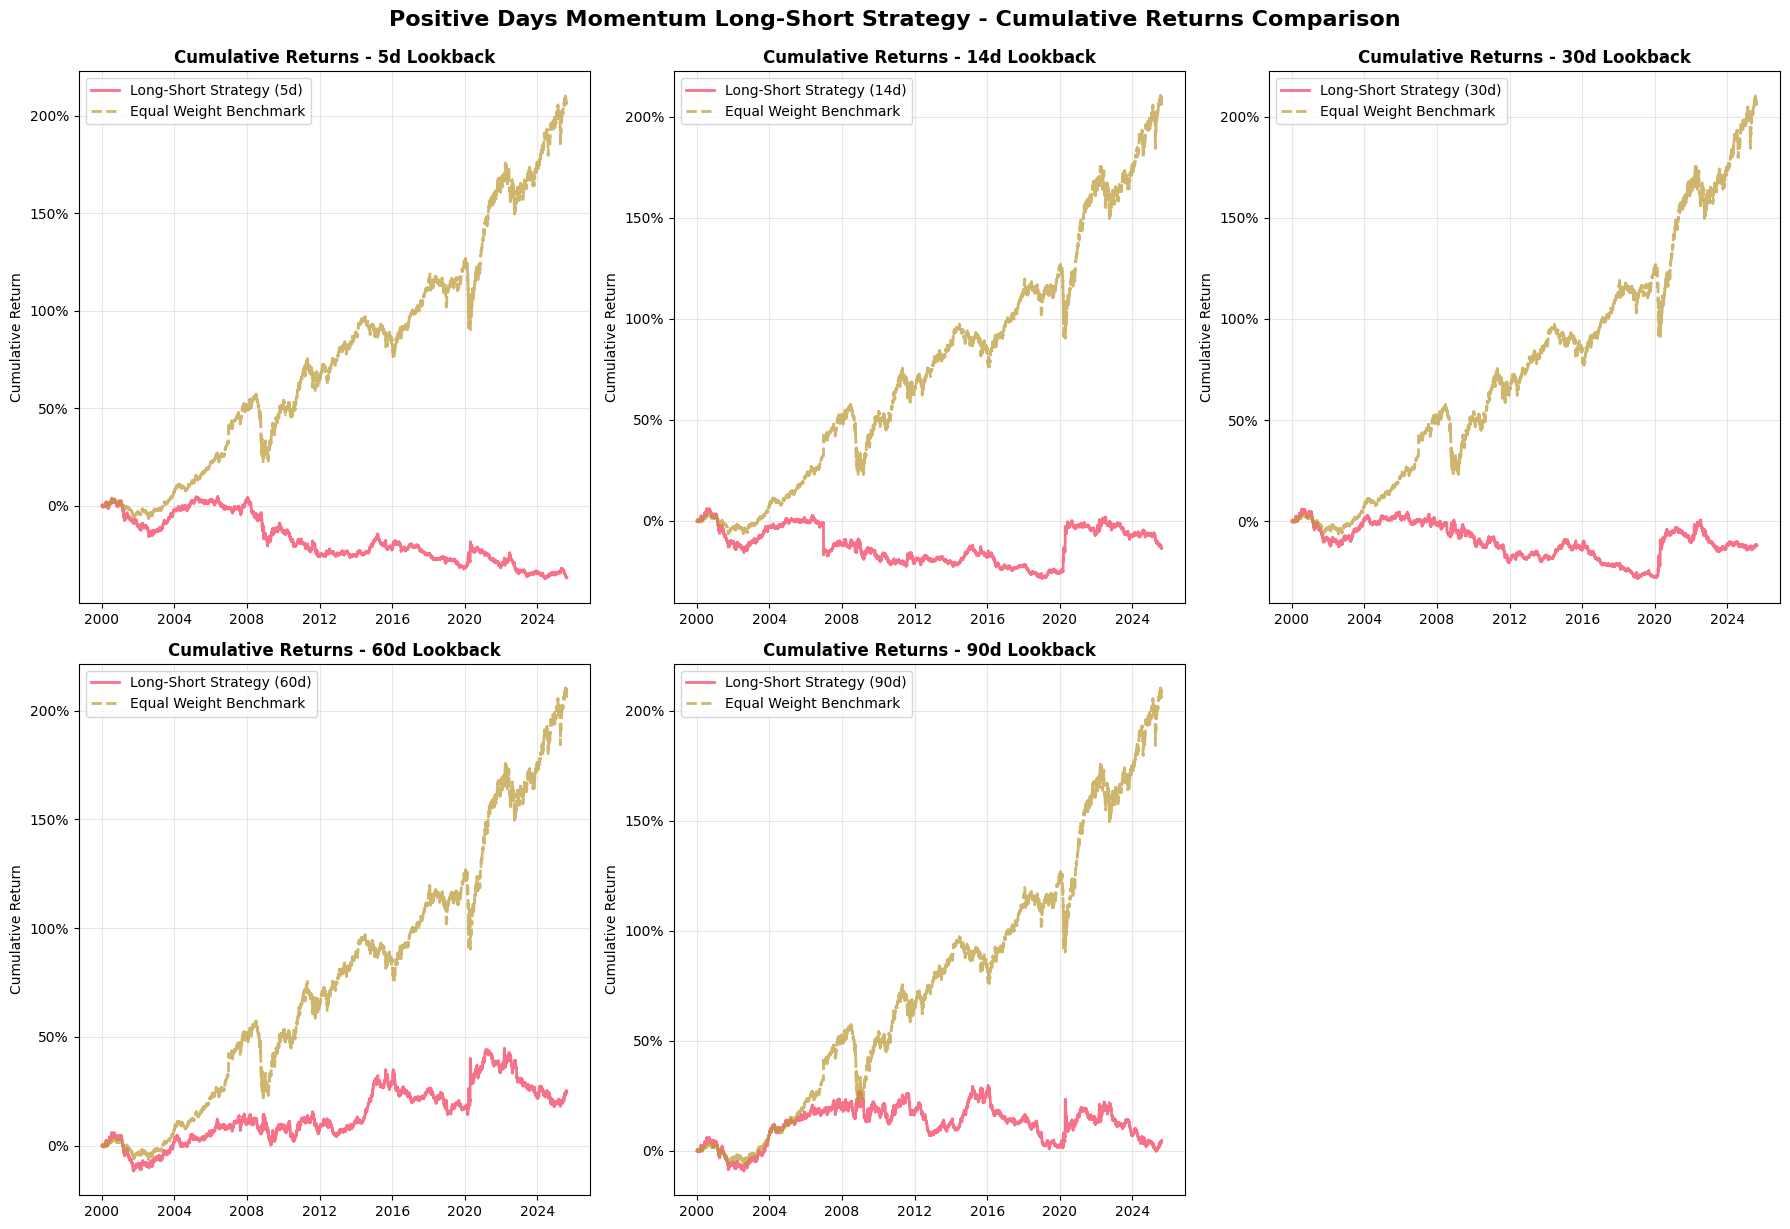

In [5]:
# Plot cumulative returns for all strategies
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (period, result) in enumerate(results.items()):
    ax = axes[i]
    
    # Plot strategy and benchmark cumulative returns
    strategy_cum = result['strategy_cumulative']
    benchmark_cum = result['benchmark_cumulative']
    
    ax.plot(strategy_cum.index, strategy_cum.values, label=f'Long-Short Strategy ({period})', linewidth=2)
    ax.plot(benchmark_cum.index, benchmark_cum.values, label='Equal Weight Benchmark', 
           linestyle='--', alpha=0.7, linewidth=2)
    
    ax.set_title(f'Cumulative Returns - {period} Lookback', fontsize=12, fontweight='bold')
    ax.set_ylabel('Cumulative Return')
    ax.legend()
    ax.grid(True, alpha=0.3)
    
    # Format y-axis as percentage
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0%}'.format(y-1)))

# Remove empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.suptitle('Positive Days Momentum Long-Short Strategy - Cumulative Returns Comparison', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

## Risk-Return Analysis

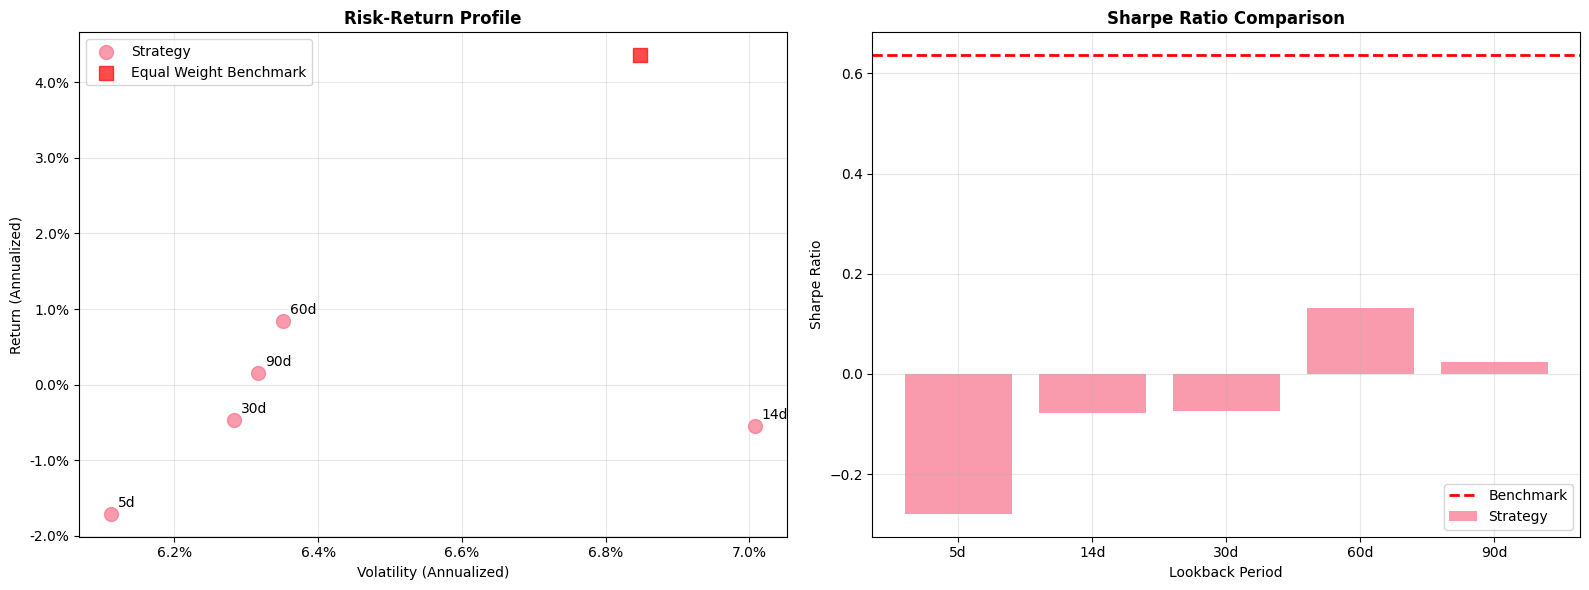

In [6]:
# Risk-Return scatter plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Strategy risk-return
strategy_returns = [results[p]['strategy_metrics']['Annualized Return'] for p in metrics_df.index]
strategy_vols = [results[p]['strategy_metrics']['Volatility'] for p in metrics_df.index]
benchmark_return = results['5d']['benchmark_metrics']['Annualized Return']
benchmark_vol = results['5d']['benchmark_metrics']['Volatility']

ax1.scatter(strategy_vols, strategy_returns, s=100, alpha=0.7, label='Strategy')
ax1.scatter(benchmark_vol, benchmark_return, s=100, marker='s', color='red', 
           alpha=0.7, label='Equal Weight Benchmark')

# Add labels for each point
for i, period in enumerate(metrics_df.index):
    ax1.annotate(period, (strategy_vols[i], strategy_returns[i]), 
                xytext=(5, 5), textcoords='offset points', fontsize=10)

ax1.set_xlabel('Volatility (Annualized)')
ax1.set_ylabel('Return (Annualized)')
ax1.set_title('Risk-Return Profile', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))

# Sharpe ratio comparison
strategy_sharpes = [results[p]['strategy_metrics']['Sharpe Ratio'] for p in metrics_df.index]
benchmark_sharpe = results['5d']['benchmark_metrics']['Sharpe Ratio']

x_pos = np.arange(len(metrics_df.index))
ax2.bar(x_pos, strategy_sharpes, alpha=0.7, label='Strategy')
ax2.axhline(y=benchmark_sharpe, color='red', linestyle='--', linewidth=2, label='Benchmark')

ax2.set_xlabel('Lookback Period')
ax2.set_ylabel('Sharpe Ratio')
ax2.set_title('Sharpe Ratio Comparison', fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(metrics_df.index)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Drawdown Analysis

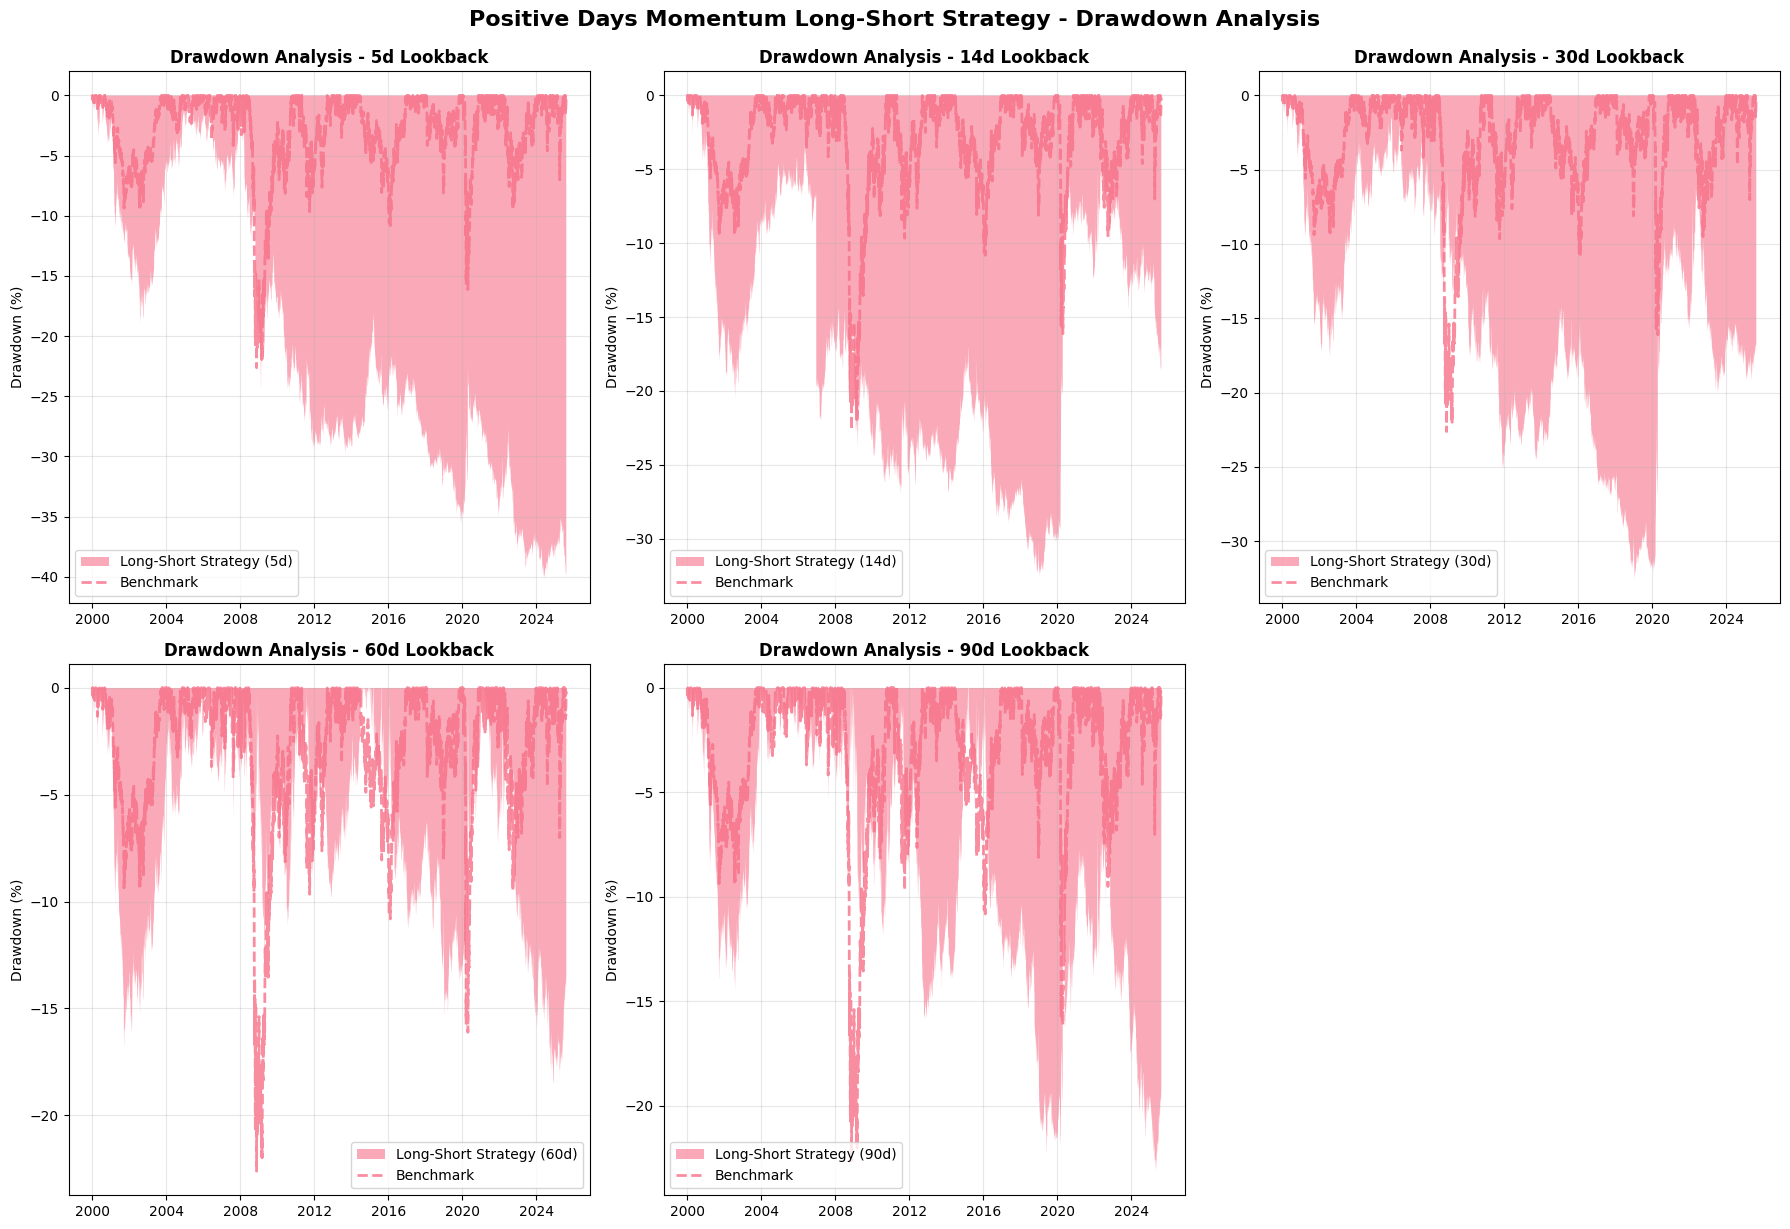

In [7]:
# Calculate and plot drawdowns for each strategy
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (period, result) in enumerate(results.items()):
    ax = axes[i]
    
    # Calculate drawdowns
    strategy_cum = result['strategy_cumulative']
    benchmark_cum = result['benchmark_cumulative']
    
    strategy_drawdown = (strategy_cum / strategy_cum.expanding().max() - 1) * 100
    benchmark_drawdown = (benchmark_cum / benchmark_cum.expanding().max() - 1) * 100
    
    ax.fill_between(strategy_drawdown.index, strategy_drawdown.values, 0, 
                   alpha=0.6, label=f'Long-Short Strategy ({period})')
    ax.plot(benchmark_drawdown.index, benchmark_drawdown.values, 
           linestyle='--', linewidth=2, alpha=0.8, label='Benchmark')
    
    ax.set_title(f'Drawdown Analysis - {period} Lookback', fontsize=12, fontweight='bold')
    ax.set_ylabel('Drawdown (%)')
    ax.legend()
    ax.grid(True, alpha=0.3)

# Remove empty subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.suptitle('Positive Days Momentum Long-Short Strategy - Drawdown Analysis', 
             fontsize=16, fontweight='bold', y=1.02)
plt.show()

## Long/Short Allocation Analysis

Long/Short Allocation Analysis for Best Strategy (60d lookback):


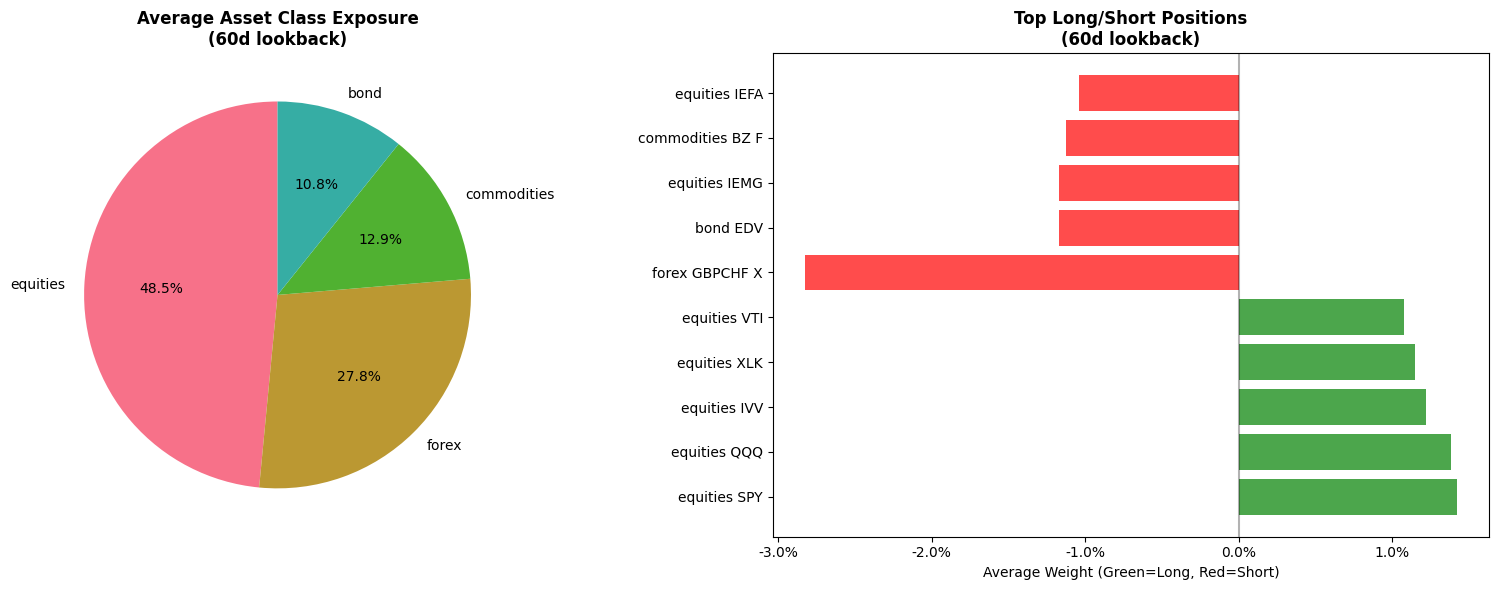


Long/Short Summary:
Total Long Exposure: 16.24%
Total Short Exposure: 16.60%
Net Exposure: -0.36%
Gross Exposure: 32.84%

Asset Class Exposure (Absolute):
Equities: 5.78%
Forex: 3.32%
Commodities: 1.54%
Bond: 1.28%


In [8]:
# Analyze long/short allocation for best performing strategy
best_period = metrics_df['Strategy Sharpe'].idxmax()
best_result = results[best_period]

print(f"Long/Short Allocation Analysis for Best Strategy ({best_period} lookback):")
print("="*60)

# Calculate average weights by asset class (positive = long, negative = short)
weights = best_result['strategy_weights']
avg_weights = weights.mean()

# Separate long and short positions
long_weights = avg_weights[avg_weights > 0]
short_weights = avg_weights[avg_weights < 0].abs()  # Make positive for display

# Extract asset class from column names
asset_classes = {}
for asset in avg_weights.index:
    if '_' in asset:
        asset_class = asset.split('_')[0]
        if asset_class not in asset_classes:
            asset_classes[asset_class] = []
        asset_classes[asset_class].append(avg_weights[asset])

# Calculate asset class allocations
class_allocations = {}
for asset_class, weights_list in asset_classes.items():
    class_allocations[asset_class] = sum(weights_list)

# Create pie chart
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Asset class allocation pie chart (absolute values)
class_df = pd.Series(class_allocations).abs().sort_values(ascending=False)
ax1.pie(class_df.values, labels=class_df.index, autopct='%1.1f%%', startangle=90)
ax1.set_title(f'Average Asset Class Exposure\n({best_period} lookback)', fontweight='bold')

# Top 10 long and short positions
top_long = long_weights.nlargest(5)
top_short = short_weights.nlargest(5)

# Combine for display
combined_positions = pd.concat([top_long, -top_short])  # Negative for shorts
colors = ['green' if x > 0 else 'red' for x in combined_positions.values]

ax2.barh(range(len(combined_positions)), combined_positions.values, color=colors, alpha=0.7)
ax2.set_yticks(range(len(combined_positions)))
ax2.set_yticklabels([asset.replace('_', ' ') for asset in combined_positions.index])
ax2.set_xlabel('Average Weight (Green=Long, Red=Short)')
ax2.set_title(f'Top Long/Short Positions\n({best_period} lookback)', fontweight='bold')
ax2.xaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1%}'.format(y)))
ax2.axvline(x=0, color='black', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nLong/Short Summary:")
print(f"Total Long Exposure: {long_weights.sum():.2%}")
print(f"Total Short Exposure: {short_weights.sum():.2%}")
print(f"Net Exposure: {avg_weights.sum():.2%}")
print(f"Gross Exposure: {(long_weights.sum() + short_weights.sum()):.2%}")

print("\nAsset Class Exposure (Absolute):")
for asset_class, allocation in class_df.items():
    print(f"{asset_class.capitalize()}: {allocation:.2%}")

## Strategy Summary and Insights

In [9]:
# Summary statistics
print("POSITIVE DAYS MOMENTUM LONG-SHORT STRATEGY - FINAL SUMMARY")
print("="*80)

best_strategy = results[best_period]
benchmark = results['5d']['benchmark_metrics']

print(f"\nBest Performing Long-Short Strategy: {best_period} lookback period")
print(f"Strategy Period: {best_strategy['strategy_cumulative'].index[0].strftime('%Y-%m-%d')} to {best_strategy['strategy_cumulative'].index[-1].strftime('%Y-%m-%d')}")
print(f"Total Assets Analyzed: {len(best_strategy['prices'].columns)}")

print("\nPERFORMANCE COMPARISON:")
print("-" * 50)
metrics_to_show = ['Annualized Return', 'Sharpe Ratio', 'Volatility', 'Max Drawdown']

for metric in metrics_to_show:
    strategy_val = best_strategy['strategy_metrics'][metric]
    benchmark_val = benchmark[metric]
    
    if metric in ['Annualized Return', 'Volatility', 'Max Drawdown']:
        print(f"{metric:20s}: {strategy_val:>8.2%} vs {benchmark_val:>8.2%} (benchmark)")
    else:
        print(f"{metric:20s}: {strategy_val:>8.3f} vs {benchmark_val:>8.3f} (benchmark)")

print("\nKEY INSIGHTS:")
print("-" * 50)
best_sharpe_period = metrics_df['Strategy Sharpe'].idxmax()
worst_sharpe_period = metrics_df['Strategy Sharpe'].idxmin()
best_return_period = metrics_df['Strategy Ann. Return'].idxmax()

print(f"• Best Sharpe Ratio: {best_sharpe_period} lookback ({metrics_df.loc[best_sharpe_period, 'Strategy Sharpe']:.3f})")
print(f"• Highest Return: {best_return_period} lookback ({metrics_df.loc[best_return_period, 'Strategy Ann. Return']:.2%})")
print(f"• Most consistent across lookbacks: {'5d' if metrics_df['Strategy Sharpe'].std() < 0.1 else 'Variable performance'}")
print(f"• Long-Short strategy outperformed benchmark in {sum(metrics_df['Strategy Sharpe'] > metrics_df['Benchmark Sharpe'])}/{len(metrics_df)} cases")
print(f"• Strategy utilizes both long and short positions for enhanced returns and risk management")

print("\n" + "="*80)

POSITIVE DAYS MOMENTUM LONG-SHORT STRATEGY - FINAL SUMMARY

Best Performing Long-Short Strategy: 60d lookback period
Strategy Period: 2000-01-03 to 2025-08-15
Total Assets Analyzed: 63

PERFORMANCE COMPARISON:
--------------------------------------------------
Annualized Return   :    0.84% vs    4.36% (benchmark)
Sharpe Ratio        :    0.132 vs    0.636 (benchmark)
Volatility          :    6.35% vs    6.85% (benchmark)
Max Drawdown        :  -18.52% vs  -22.63% (benchmark)

KEY INSIGHTS:
--------------------------------------------------
• Best Sharpe Ratio: 60d lookback (0.132)
• Highest Return: 60d lookback (0.84%)
• Most consistent across lookbacks: Variable performance
• Long-Short strategy outperformed benchmark in 0/5 cases
• Strategy utilizes both long and short positions for enhanced returns and risk management

